In [ ]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import ConfusionMatrixDisplay

#Data Labeling

>0 for Poor

>1 for Neutral

>2 for Good

These values will be added to a new column for labels




In [ ]:
def label_data():
    rows = pd.read_csv('Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',',engine='python')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('2')   #Good
        elif cell == 3:
            labels.append('1')   #Neutral
        else:
            labels.append('0')   #Poor

    rows['Label'] = labels
    del rows['Review Votes']
    return rows

#Data Cleaning

Removing all rows containing blank cells, results are stored in **'labelled_dataset.csv'**

In [ ]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()

    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)

    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    data.to_csv('labelled_dataset.csv', index=False)
    return data

# Data Preprocessing

The folllowing steps are implemented to convert raw reviews into cleaned reviews, which will be easier for feature extraction.



* remove html tags using BeautifulSoup
* remove non-character such as digits and symbols
* convert to lower case
* remove stop words such as "the" and "and" if needed
* convert to root words by stemming if needed



In [ ]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case

    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    if stemming==True: # stemming
        #stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english')
        words = [stemmer.stem(w) for w in words]

    if split_text==True:  # split text
        return (words)

    return( " ".join(words))

In [ ]:
def modelEvaluation(predictions, y_test_set):

#Print model evaluation to predicted result
  print("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
# Printing the classification report
  print("\nClassification report : \n{}".format(classification_report(y_test_set, predictions)))
# Printing the confusion matrix
  print("\nConfusion Matrix : \n{}".format(confusion_matrix(y_test_set, predictions)))

# Bag of Words

The sentiment analysis of given text can be done in two ways. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

* Step 1 : Preprocess raw reviews to cleaned reviews
* Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
* Step 3 : Transform review text to numerical representations (feature vectors)
* Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
* Step 5 : Improve the model performance by GridSearch


In [ ]:
if __name__ == '__main__':
    data = label_data()
    data = clean_data(data)


# Data Visualisation

Text(0, 0.5, 'Count')

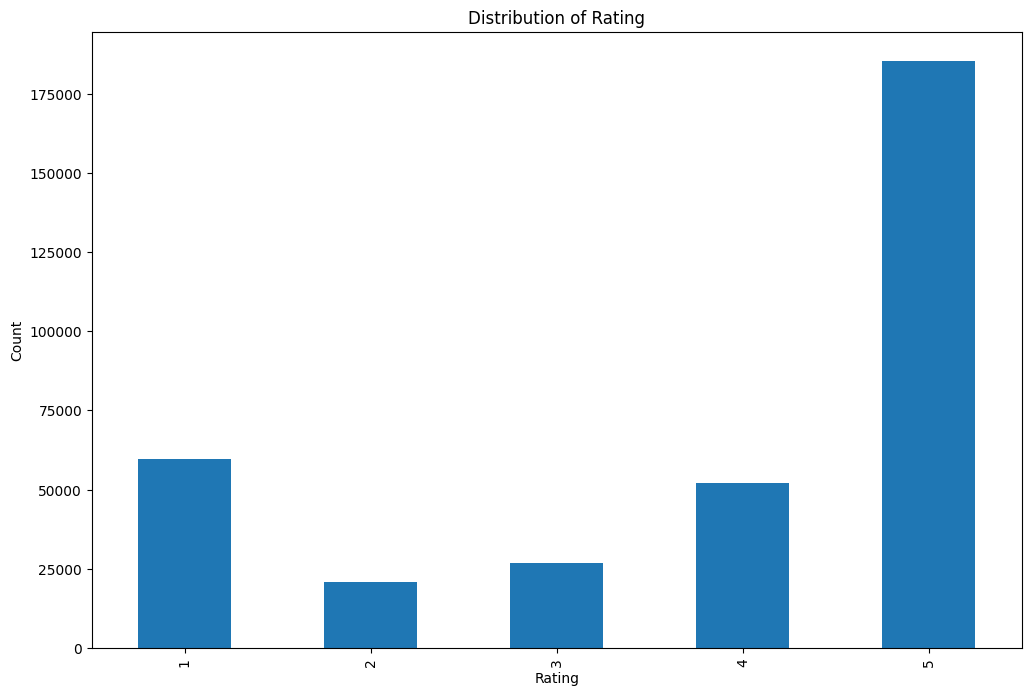

In [ ]:
# Plot distribution of rating
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

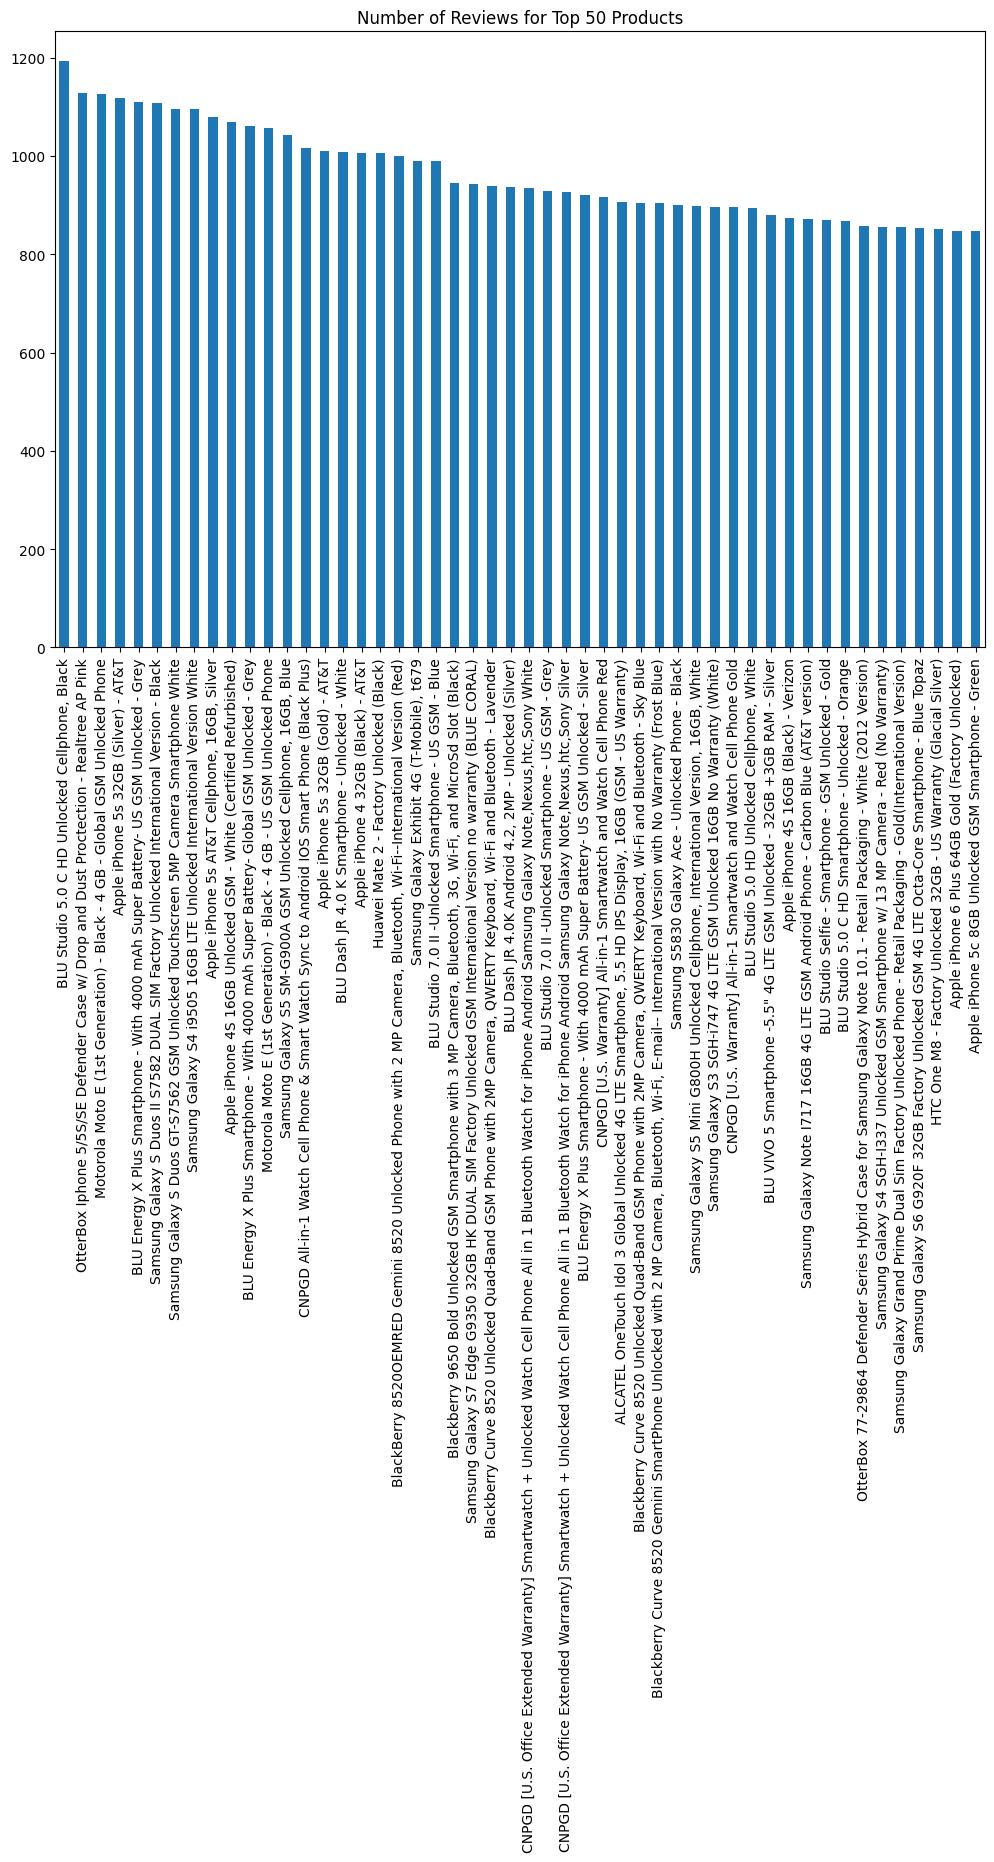

In [ ]:
# Plot number of reviews for top 50 products
products = data["Product Name"].value_counts()
plt.figure(figsize=(12,8))
products[:50].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

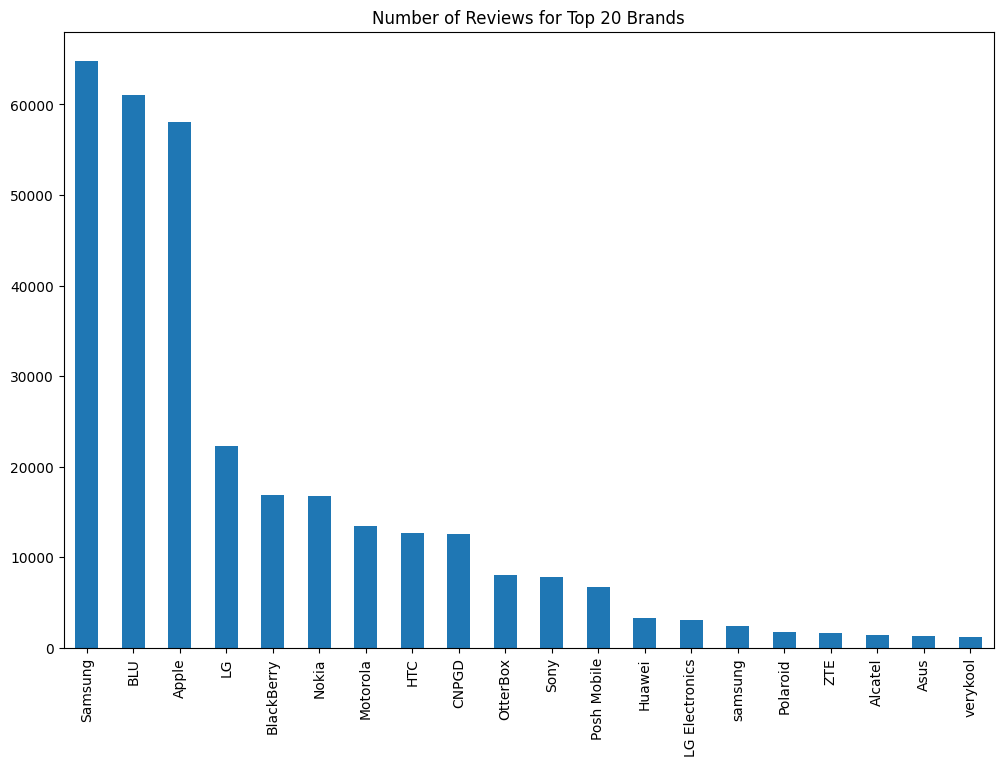

In [ ]:
# Plot number of reviews for top 20 brands
brands = data["Brand Name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")

Text(0, 0.5, 'Count')

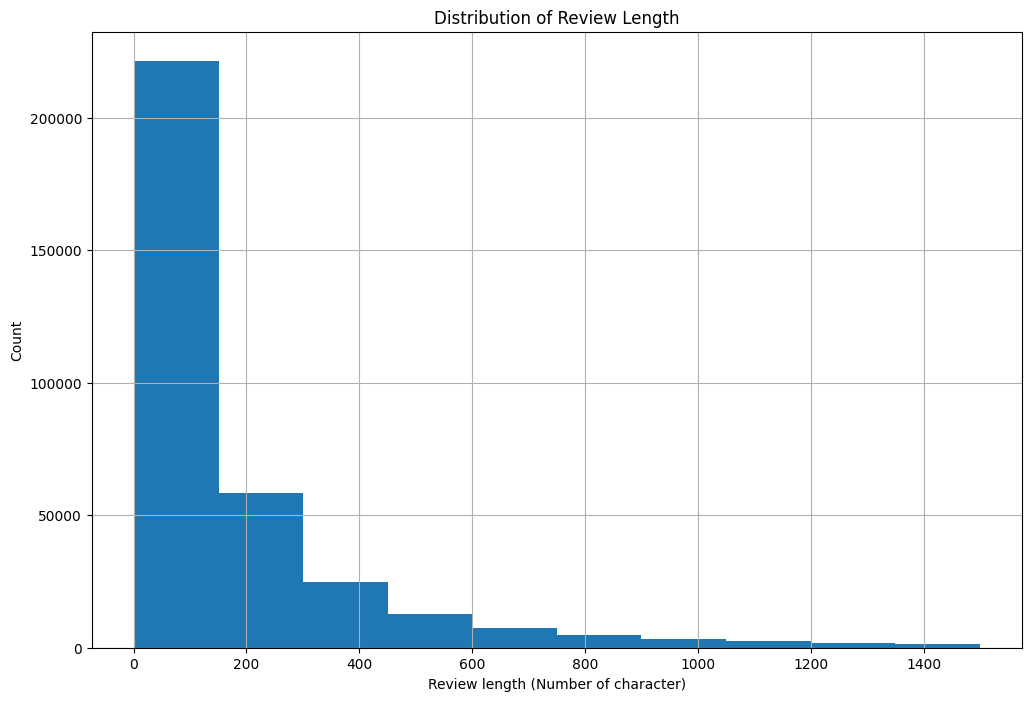

In [ ]:
# Plot distribution of review length
review_length = data["Reviews"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [ ]:
#split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(data['Reviews'], data['Label'], test_size=0.1, random_state=0)

In [ ]:
# Preprocess text data in training set and validation set
x_train_cleaned = []
x_test_cleaned = []

for d in x_train:
  x_train_cleaned.append(cleanText(d))
for d in x_test:
  x_test_cleaned.append(cleanText(d))

In [ ]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
print("Number of features: %d \n" % len(tfidf.get_feature_names_out()))
print("Show some feature names: \n", tfidf.get_feature_names_out()[::1000])



Number of features: 21131 

Show some feature names: 
 ['00' '9100' 'appearence' 'blinding' 'choked' 'cracked' 'directo' 'eq'
 'floored' 'guidebook' 'indiscernible' 'leads' 'miami' 'occupied' 'pig'
 'quedo' 'reviewedblackberry' 'shutting' 'studies' 'tmob' 'varies' 'youll']


#SVM

In [ ]:
x_train_input = tfidf.transform(x_train_cleaned)
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(x_train_input, y_train)
y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))


# Functions for Model Evaluation
* accuracy score
* f_score
* f1_score
* confusion matrix


In [ ]:
print("Accuracy of this SVM = " + str(metrics.accuracy_score(y_test, y_svr_lin_predicted)))
print("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
print("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))

Accuracy of this SVM = 0.8914980697222141


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Fscore of this SVM = (0.8831870327066135, 0.8914980697222141, 0.8769993828777858, None)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.8769993828777858
Confusion matrix = [[ 7219   112   807]
 [  852   672  1212]
 [  624   131 22822]]


In [ ]:
modelEvaluation(y_svr_lin_predicted, y_test)


Accuracy on validation set: 0.8915

Classification report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      8138
           1       0.73      0.25      0.37      2736
           2       0.92      0.97      0.94     23577

    accuracy                           0.89     34451
   macro avg       0.83      0.70      0.72     34451
weighted avg       0.88      0.89      0.88     34451


Confusion Matrix : 
[[ 7219   112   807]
 [  852   672  1212]
 [  624   131 22822]]


# Decision Tree

In [ ]:
decTree = DecisionTreeClassifier()
decTree.fit(x_train_input, y_train)
y_decTree_predicted = decTree.predict(tfidf.transform(x_test_cleaned))

In [ ]:
modelEvaluation(y_decTree_predicted, y_test)


Accuracy on validation set: 0.9252

Classification report : 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8138
           1       0.77      0.69      0.73      2736
           2       0.95      0.96      0.96     23577

    accuracy                           0.93     34451
   macro avg       0.87      0.85      0.86     34451
weighted avg       0.92      0.93      0.92     34451


Confusion Matrix : 
[[ 7260   258   620]
 [  318  1900   518]
 [  565   297 22715]]


In [ ]:
print("Accuracy of Decision Tree =", str(decTree.score(tfidf.transform(x_test_cleaned), y_test)))
print("Fscore of this Decision Tree =", str(metrics.precision_recall_fscore_support(y_test, y_decTree_predicted, pos_label=2, average='weighted')))
print("F-1 score of this Decision Tree =", str(metrics.f1_score(y_test, y_decTree_predicted, pos_label=2, average='weighted')))

Accuracy of Decision Tree = 0.9252271341905896


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Fscore of this Decision Tree = (0.9237811493741743, 0.9252271341905896, 0.9243110678203738, None)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this Decision Tree = 0.9243110678203738
Confusion matrix = [[ 7260   258   620]
 [  318  1900   518]
 [  565   297 22715]]


# Random Forest


In [ ]:
rand = RandomForestClassifier()
rand.fit(x_train_input, y_train)
y_rand_predicted = rand.predict(tfidf.transform(x_test_cleaned))

In [ ]:
modelEvaluation(y_rand_predicted, y_test)


Accuracy on validation set: 0.9496

Classification report : 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8138
           1       0.99      0.65      0.79      2736
           2       0.95      0.99      0.97     23577

    accuracy                           0.95     34451
   macro avg       0.96      0.86      0.90     34451
weighted avg       0.95      0.95      0.95     34451


Confusion Matrix : 
[[ 7541    11   586]
 [  256  1787   693]
 [  173    16 23388]]


In [ ]:
models = ['Decision Tree', 'Random Forest', 'SVM']
accuracy = []

accuracy.append(str(decTree.score(tfidf.transform(x_test_cleaned), y_test)))
accuracy.append(str(metrics.accuracy_score(y_test, y_svr_lin_predicted)))
accuracy.append(str(rand.score(tfidf.transform(x_test_cleaned), y_test)))

print(accuracy)

['0.9252271341905896', '0.8914980697222141', '0.9496386171664103']


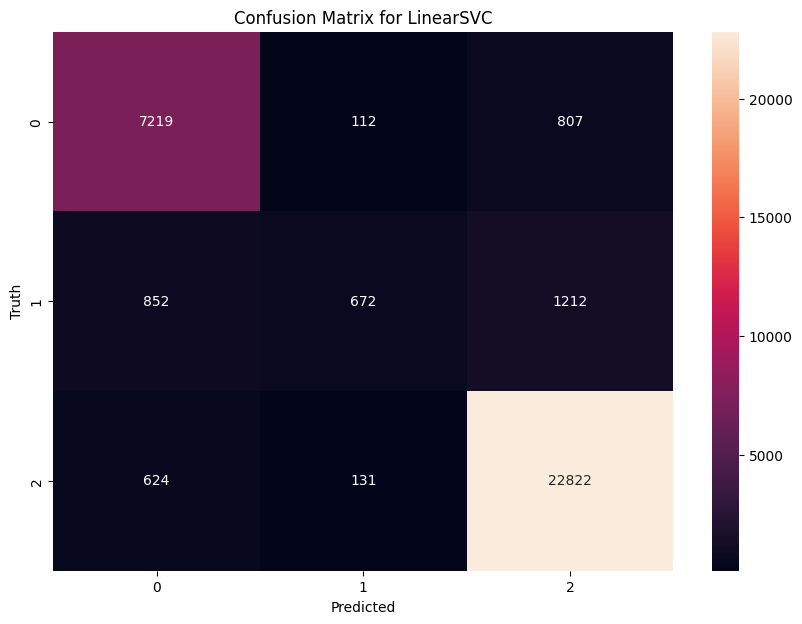

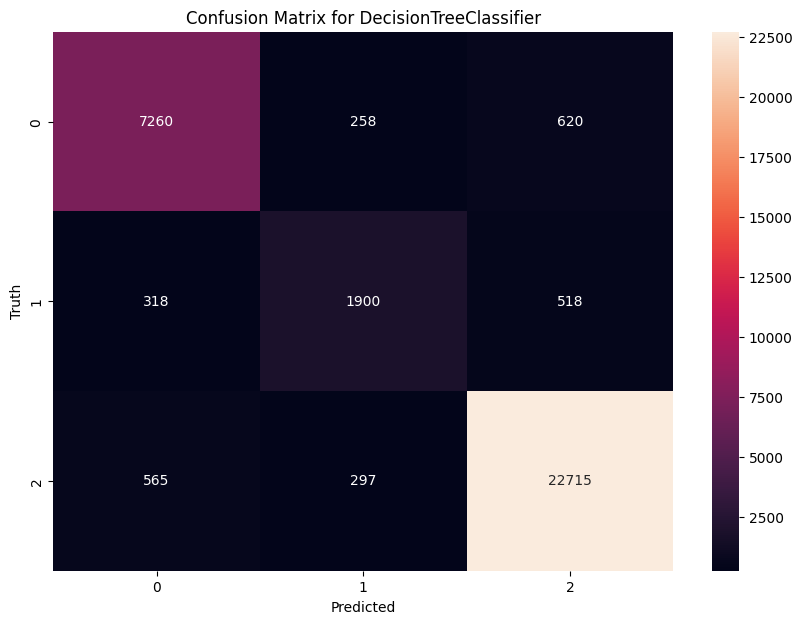

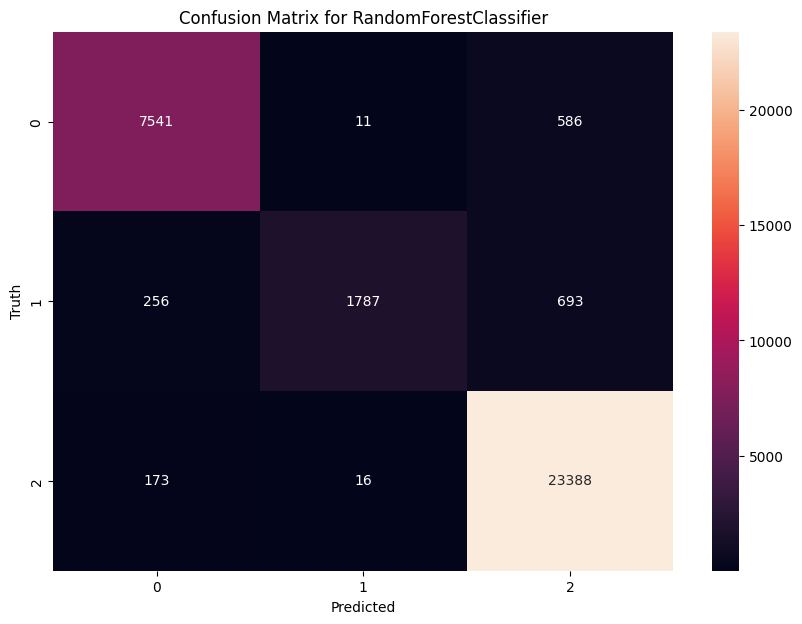

In [ ]:
classifiers = [('LinearSVC', y_svr_lin_predicted),
               ('DecisionTreeClassifier', y_decTree_predicted),
               ('RandomForestClassifier', y_rand_predicted)]

for clf, y_pred in classifiers:
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {clf}')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

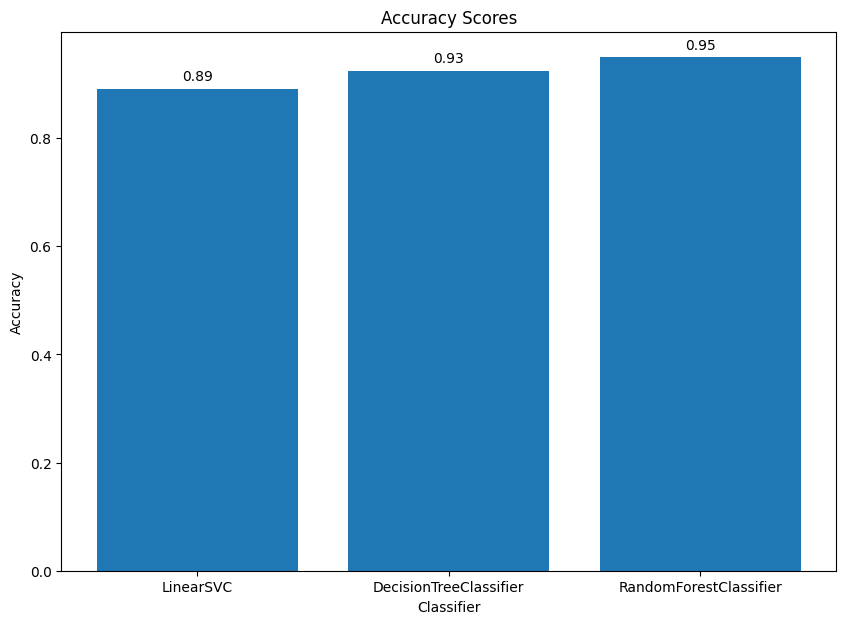

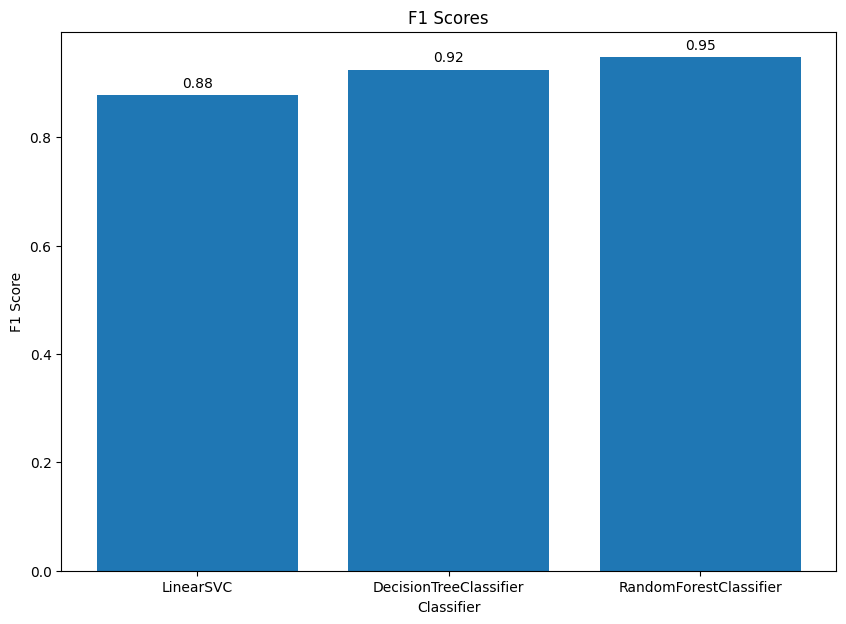

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# List of tuples with classifier and its corresponding predicted values
classifiers = [('LinearSVC', y_svr_lin_predicted),
               ('DecisionTreeClassifier', y_decTree_predicted),
               ('RandomForestClassifier', y_rand_predicted)]

# Initialize lists to store accuracy and F1 scores
accuracy_scores = []
f1_scores = []

for clf, y_pred in classifiers:
    # Compute accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems

    # Append scores to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Plot accuracy scores
plt.figure(figsize=(10,7))
bars = plt.bar([clf[0] for clf in classifiers], accuracy_scores)
plt.title('Accuracy Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add the exact values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

# Plot F1 scores
plt.figure(figsize=(10,7))
bars = plt.bar([clf[0] for clf in classifiers], f1_scores)
plt.title('F1 Scores')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')

# Add the exact values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


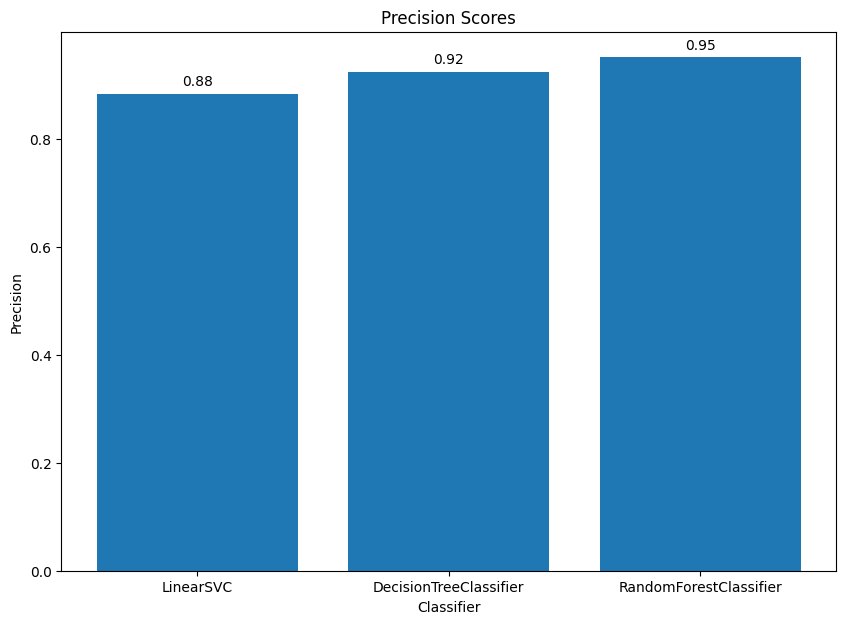

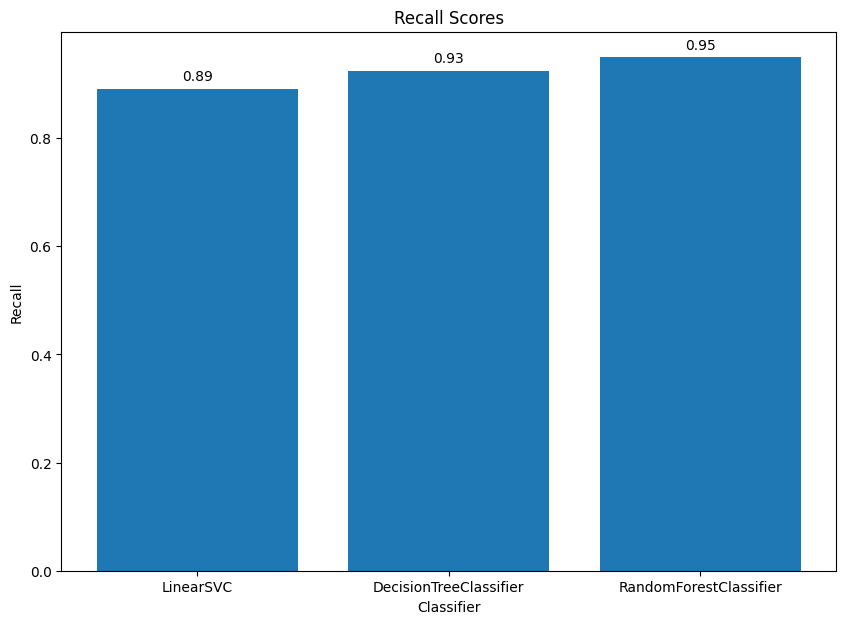

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# List of tuples with classifier and its corresponding predicted values
classifiers = [('LinearSVC', y_svr_lin_predicted),
               ('DecisionTreeClassifier', y_decTree_predicted),
               ('RandomForestClassifier', y_rand_predicted)]

# Initialize lists to store precision and recall scores
precision_scores = []
recall_scores = []

for clf, y_pred in classifiers:
    # Compute precision and recall scores
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems

    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)

# Plot precision scores
plt.figure(figsize=(10,7))
bars = plt.bar([clf[0] for clf in classifiers], precision_scores)
plt.title('Precision Scores')
plt.xlabel('Classifier')
plt.ylabel('Precision')

# Add the exact values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()

# Plot recall scores
plt.figure(figsize=(10,7))
bars = plt.bar([clf[0] for clf in classifiers], recall_scores)
plt.title('Recall Scores')
plt.xlabel('Classifier')
plt.ylabel('Recall')

# Add the exact values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


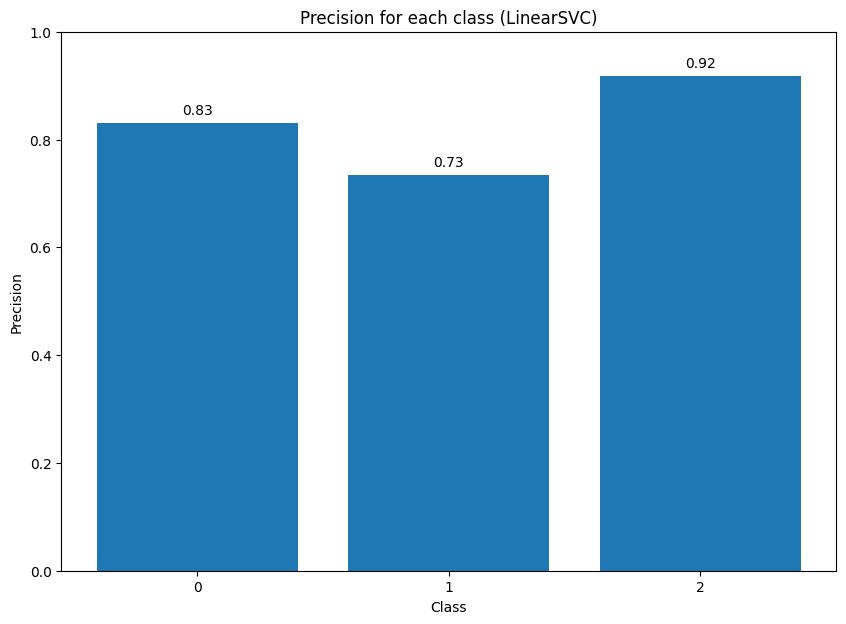

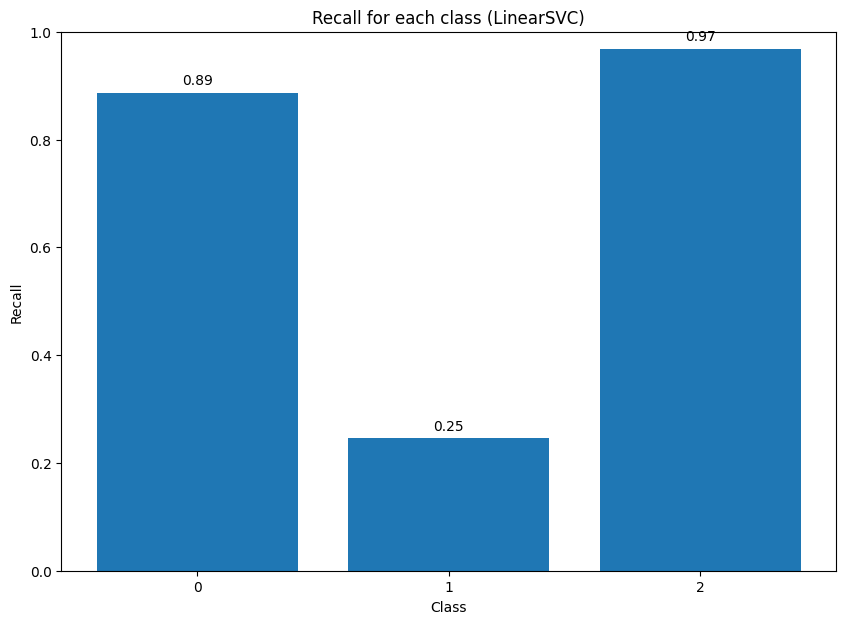

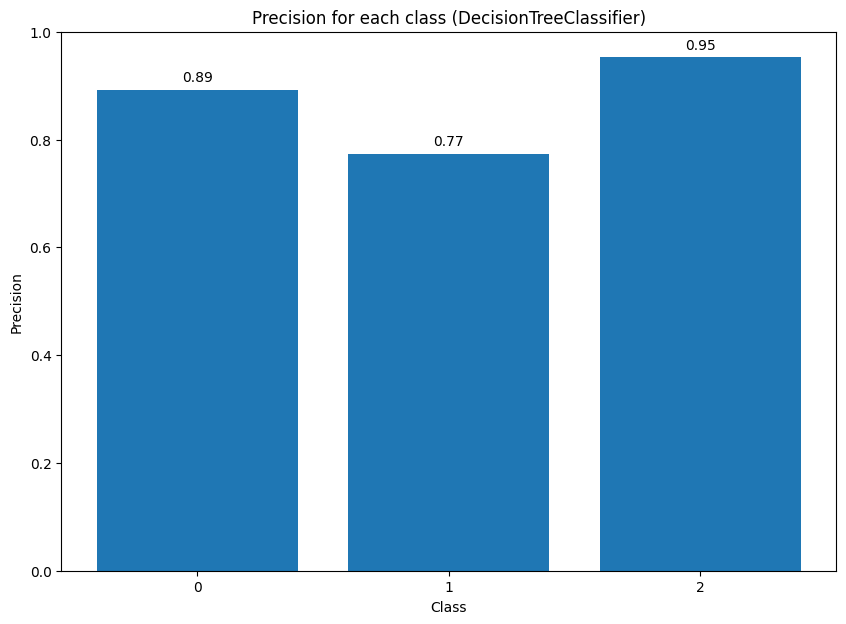

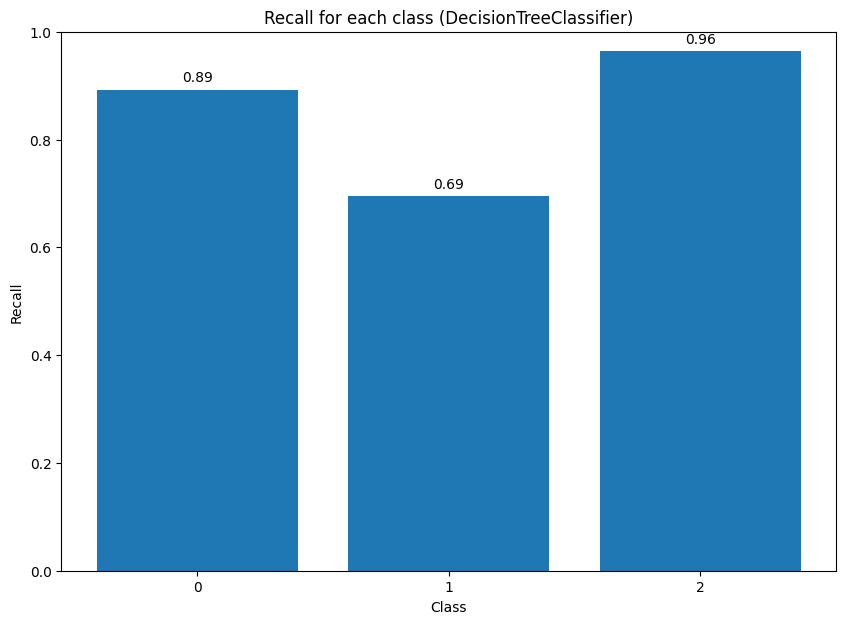

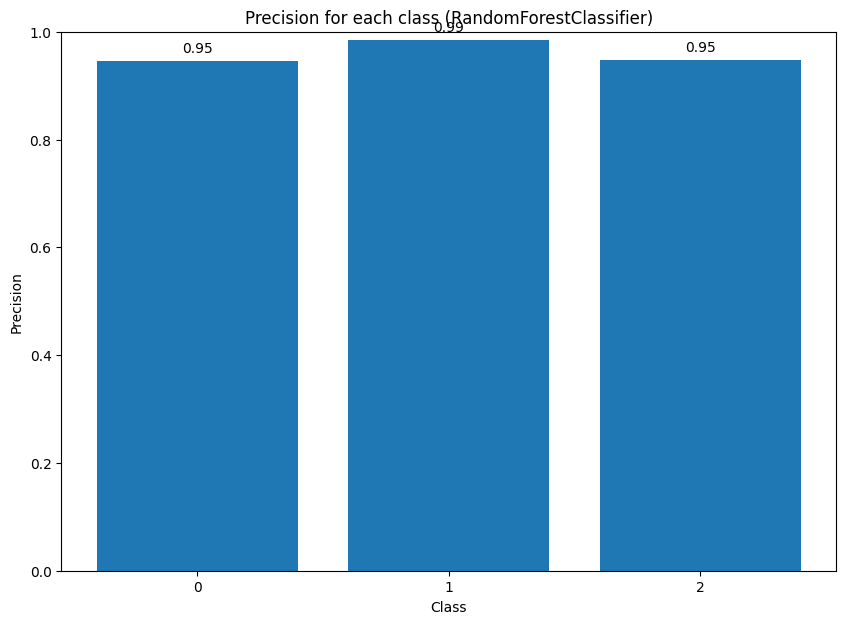

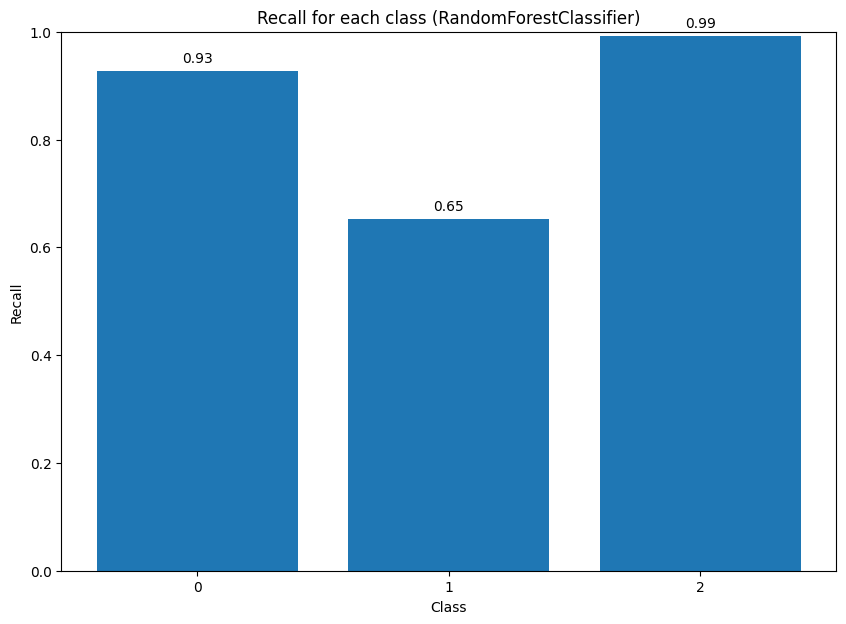

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# List of tuples with classifier and its corresponding predicted values
classifiers = [('LinearSVC', y_svr_lin_predicted),
               ('DecisionTreeClassifier', y_decTree_predicted),
               ('RandomForestClassifier', y_rand_predicted)]

# Assuming you have 3 classes
class_labels = ['0', '1', '2']

for clf, y_pred in classifiers:
    # Compute classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract precision and recall for each class
    precision = [report[label]['precision'] for label in class_labels]
    recall = [report[label]['recall'] for label in class_labels]

    # Plot precision for each class
    plt.figure(figsize=(10,7))
    bars = plt.bar(class_labels, precision)
    plt.title(f'Precision for each class ({clf})')
    plt.xlabel('Class')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])

    # Add the exact values on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.show()

    # Plot recall for each class
    plt.figure(figsize=(10,7))
    bars = plt.bar(class_labels, recall)
    plt.title(f'Recall for each class ({clf})')
    plt.xlabel('Class')
    plt.ylabel('Recall')
    plt.ylim([0.0, 1.0])

    # Add the exact values on the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.show()
